In [ ]:
#**********Mount Google Drive************
from google.colab import drive
drive.mount('/content/gdrive')

In [14]:
#***********Import required libraries***********
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#***********Version Information***********
print("Numpy Version : ",np.__version__)
print("Pandas Version : ",pd.__version__)
print("Matplotlib : ", matplotlib.__version__)
print("Seaborn : ",sns.__version__)

%matplotlib inline

Numpy Version :  1.18.5
Pandas Version :  1.0.4
Matplotlib :  3.2.1
Seaborn :  0.10.1


In [16]:
#***********Importing Data***********
data_path = 'gdrive/My Drive/DataSet/SupplyChain/SCM.csv'
dFrame = pd.read_csv(data_path)

In [19]:
#***********Total number of Row in dataframe***********
RowCount = len(dFrame)
print("Total Number of Data Count :", RowCount)

Total Number of Data Count : 10324


In [20]:
#***********Information about features for their mean,standard devivation and unique values***********
dFrame.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [21]:
#***********Type of feature**********
dFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [22]:
#***********Quick overview of data***********
dFrame.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [23]:
dFrame.dropna()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,7/13/07,2-Oct-07,2-Oct-07,2-Oct-07,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"#102198**Didanosine 200mg [Videx], tablets, 60...",Didanosine,Videx,200mg,Tablet,60,5513,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/4/07,15-Oct-07,15-Oct-07,15-Oct-07,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,7/4/07,27-Aug-07,27-Aug-07,27-Aug-07,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,10/3/07,20-Nov-07,20-Nov-07,20-Nov-07,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,64000,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,11/19/07,21-Jan-08,21-Jan-08,21-Jan-08,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,300mg,Tablet,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.80,6

In [24]:
Item = dFrame["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print("*"*45)
print(Item)

Top 10 Countries Wise Count 

*********************************************
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64


Text(0.5, 0, 'Country Name')

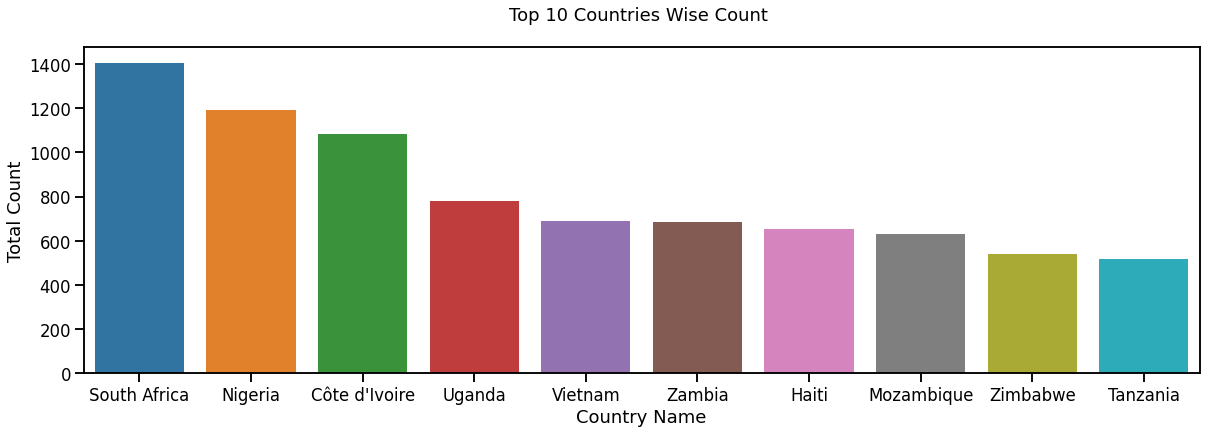

In [27]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(20,6))
sns.countplot(dFrame["Country"],order=dFrame["Country"].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

In [31]:
Price = dFrame.groupby(['Country'])['Pack Price'].sum().nlargest(10)
print("Total Pack Price for Top 10 Countries\n")
print("*"*40)
print(Price)

Total Pack Price for Top 10 Countries

****************************************
Country
Nigeria          25620.72
South Africa     24318.90
Côte d'Ivoire    22882.35
Haiti            19521.30
Uganda           15664.08
Mozambique       14092.40
Vietnam          11963.78
Zambia           11889.67
Tanzania         11047.72
Rwanda            7724.29
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

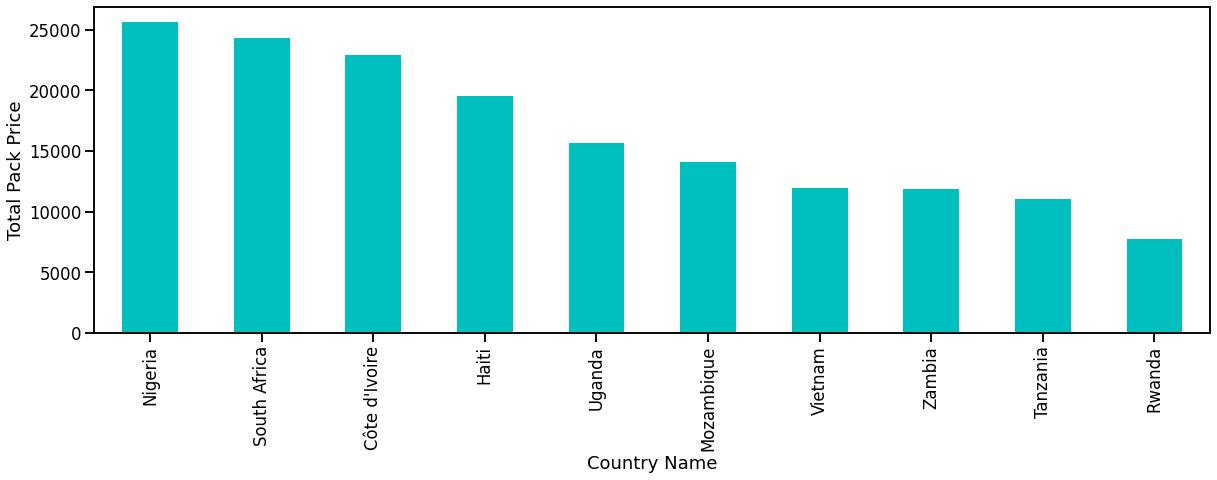

In [39]:
plt.figure(figsize=(20,6))
Price.plot(kind='bar',color='c')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

Text(0.5, 0, 'First Line Designation')

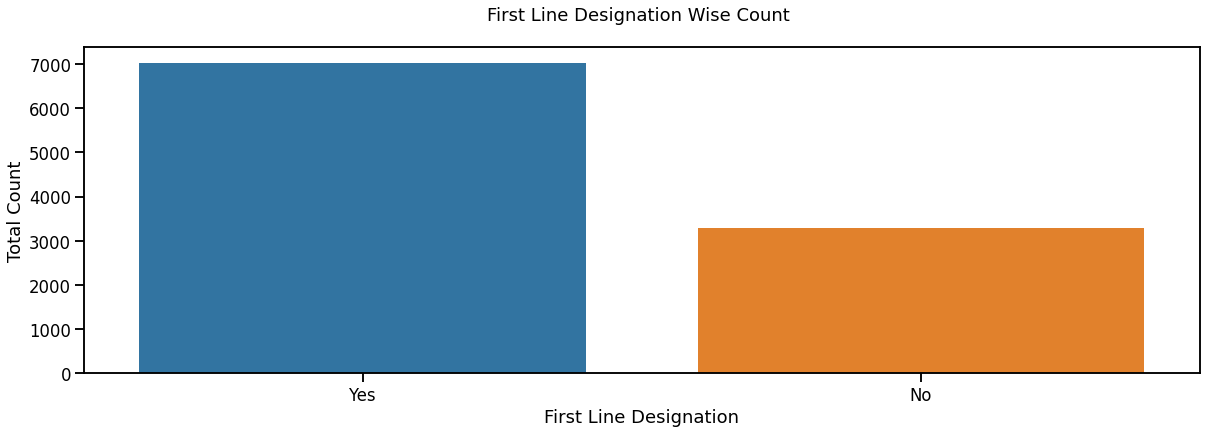

In [40]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(20,6))
sns.countplot(dFrame['First Line Designation'],order=dFrame['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [41]:
shipMode = dFrame["Shipment Mode"].value_counts()
labels = np.array(shipMode.index)
sizes = (np.array((shipMode / shipMode.sum())*100))

In [42]:
import plotly.graph_objs as go
import plotly.offline as py

In [44]:
trace = go.Pie(labels=labels,values=sizes)
lay =  go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat,layout=lay)
py.iplot(fig,filename="Shipment Mode")

In [45]:
itemUniq = dFrame["Manufacturing Site"].unique()
print("All Unique Manufacturing Site \n")
print("*"*32)
print(itemUniq)

All Unique Manufacturing Site 

********************************
['Ranbaxy Fine Chemicals LTD' 'Aurobindo Unit III, India'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'Ranbaxy, Paonta Shahib, India'
 'MSD South Granville Australia' "ABBVIE (Abbott) St. P'burg USA"
 'ABBVIE Ludwigshafen Germany' 'Trinity Biotech, Plc'
 'EY Laboratories, USA' 'Cipla, Goa, India' 'BMS Meymac, France'
 'Premier Med. Corp Ltd. India' 'Chembio Diagnostics Sys. Inc.'
 'Inverness Japan' 'Pacific Biotech, Thailand'
 'Standard Diagnostics, Korea' 'GSK Mississauga (Canada)'
 'Gilead(Nycomed) Oranienburg DE' 'Bio-Rad Laboratories'
 'Mylan (formerly Matrix) Nashik' 'Roche Basel' 'GSK Ware (UK)'
 'Novartis Pharma AG, Switzerland' 'BI, Ingelheim, Germany'
 'Not Applicable' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'GSK Aranda'
 'Hetero Unit III Hyderabad IN' 'ABBVIE (Abbott) France'
 'Strides, Bangalore, India.' 'ABBSP' 'Cipla, 

In [46]:
shipMode = dFrame[dFrame['Shipment Mode']=='Air']
print("Air max shipment mode  : ", shipMode['Unit of Measure (Per Pack)'].max())
print("Air min shipment mode  : ", shipMode['Unit of Measure (Per Pack)'].min())
print("Air mean shipment mode  : ", round(shipMode['Unit of Measure (Per Pack)'].mean() ,2))

Air max shipment mode  :  1000
Air min shipment mode  :  1
Air mean shipment mode  :  82.34


In [48]:
plt.figure(figsize=(20,6))
Manufact = dFrame.groupby('Manufacturing Site').size().nlargest(10)
print(Manufact)
print("*"*20)

Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
dtype: int64
********************


<Figure size 1440x432 with 0 Axes>

Text(0.5, 0, 'Manufacturing Site Name')

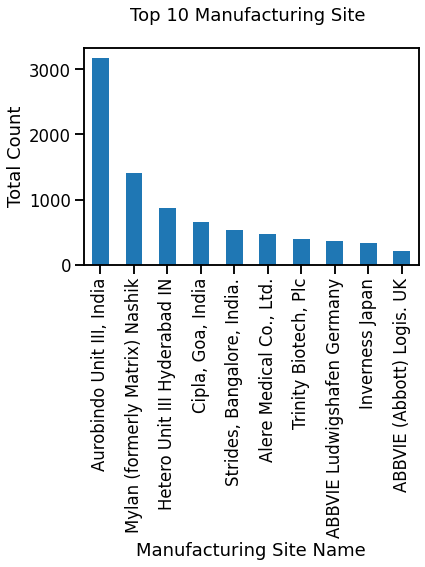

In [49]:
Manufact.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

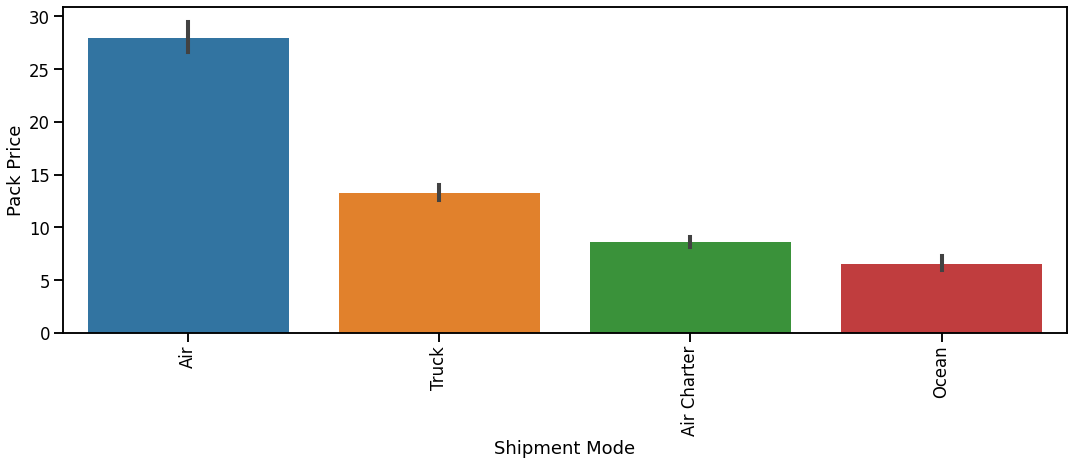

In [52]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Pack Price', data = dFrame)
plt.show()

**Conclusion for Supply chain Dataset**

*   Top Country for Pack Price : Nigeria - *25,620.72*
*   Top Shipping Mode : *Air*
*   The Max Air Shipment Mode is : *1000*
*   The Min Air Shipment is : *1*
*   The Mean Air Shipment is : *82.35*
*   Top Manufacturing Site : *Aurobindo Unit III, India - 3172*
*   Top Air Manufacturing Site : *Aurobindo Unit III, India - 1694*


